In [1]:
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
#Getting the Data 
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [30]:
#Data Exploration / Analysis
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null int64
Embarked     891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: int64(9)
memory usage: 62.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
relatives      418 non-null int64
not_alone      418 non-null int64
Deck           418 non-null int64
dtypes: int64(9)
memory usage: 29.5 KB


In [4]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
# Converter algumas features para numérico
# Diferentes ranges que devem ser convertidos para o mesmo range
# Contém 'missing values' que é preciso lidar
# Ver os dados que realmente faltam:

total = train_df.isnull().sum().sort_values(ascending=False)

# percentagens dos valores que faltam
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(6)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


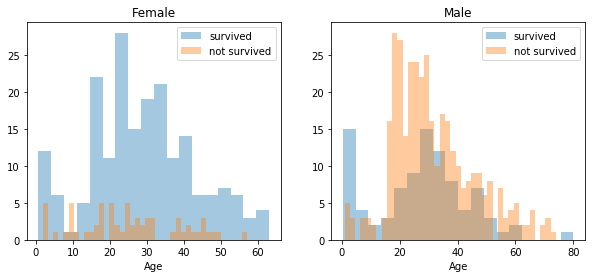

In [6]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

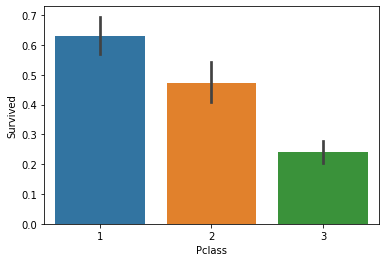

In [7]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [8]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df = train_df.drop(['SibSp'], axis=1)
test_df = test_df.drop(['SibSp'], axis=1)
train_df = train_df.drop(['Parch'], axis=1)
test_df = test_df.drop(['Parch'], axis=1)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [9]:
#Data preprocessing

train_df = train_df.drop(['PassengerId'], axis=1)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)


In [10]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [11]:
#preencher os valores vazios da idade
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [12]:
train_df["Age"].isnull().sum()

0

In [13]:
#Como no 'Embarked' só faltam 2 valores aqui preenchemos com o valor mais comum
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    

In [15]:
#Fare
#Converting “Fare” from float to int64, using the “astype()” function
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [16]:
#Converter para numérico
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [17]:
# Converter sexo para numérico
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null int64
Fare         891 non-null int64
Embarked     891 non-null int64
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: int64(9)
memory usage: 62.8 KB


In [19]:
#Criar os dados de treino e teste (sem label e com label)
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [29]:
print(X_test)
print(X_train)

     Pclass  Sex  Age  Fare  Embarked  relatives  not_alone  Deck
0         3    0   22     7         2          0          1     8
1         3    1   38     7         0          1          0     8
2         2    0   26     9         2          0          1     8
3         3    0   35     8         0          0          1     8
4         3    1   35    12         0          2          0     8
..      ...  ...  ...   ...       ...        ...        ...   ...
413       3    0   17     8         0          0          1     8
414       1    1   44   108         1          0          1     3
415       3    0   22     7         0          0          1     8
416       3    0   34     8         0          0          1     8
417       3    0   18    22         1          2          0     8

[418 rows x 8 columns]
     Pclass  Sex  Age  Fare  Embarked  relatives  not_alone  Deck
0         3    0   22     7         0          1          0     8
1         1    1   38    71         1          1    

In [21]:
#Criar o modelo de machine learning

## Stochastic Gradient Descent (SGD):

sgd = linear_model.SGDClassifier(max_iter=10, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


In [22]:
## Random Forest: 
random_forest = RandomForestClassifier(n_estimators=150)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)


In [23]:
## Logistic Regression:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/home/angela/.virtualenvs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
##K Nearest Neighbor:

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [25]:
## Gaussian Naive Bayes:

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [26]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent'],
    'Score': [acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
97.19,Random Forest
83.50,KNN
80.58,Logistic Regression
78.45,Naive Bayes
75.08,Stochastic Gradient Decent


In [27]:
X_test.head(500)

,Pclass,Sex,Age,Fare,Embarked,relatives,not_alone,Deck
0,3,0,22,7,2,0,1,8
1,3,1,38,7,0,1,0,8
2,2,0,26,9,2,0,1,8
3,3,0,35,8,0,0,1,8
4,3,1,35,12,0,2,0,8
...,...,...,...,...,...,...,...,...
413,3,0,17,8,0,0,1,8
414,1,1,44,108,1,0,1,3
415,3,0,22,7,0,0,1,8
416,3,0,34,8,0,0,1,8


In [28]:
# Como o Random Forest teve o melhor desempenho, vamos usá-lo para prever se nós sobreviveriamos
new=[[1,0,5,22,0,1,1,8]]
pred = random_forest.predict(new)
print(pred)

if pred == 0: 
    print('Oh no! You didn\' t make it')
else:
    print('Nice! You survived')

[1]
Nice! You survived


https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8